In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df = pd.read_csv("credito.csv")  #print(df.head())

# Verificar o tamanho do dataset (quantidade de linhas e colunas)
print(df.shape)

# Ver o nome das colunas  #print(df.columns)

# Ver informações gerais (tipos de dados, valores nulos)
print(df.info())

(10127, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             10127 non-null  object
 6   estado_civil             10127 non-null  object
 7   salario_anual            10127 non-null  object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     1

In [4]:
# Estatísticas descritivas das variáveis numéricas
print(df.describe().round(2))

# Estatísticas descritivas das variáveis categóricas
print(df.describe(include=["O"]))

print(df.isna().sum())     # Valores faltantes na base de dados


                 id   default     idade  dependentes  meses_de_relacionamento  \
count  1.012700e+04  10127.00  10127.00     10127.00                 10127.00   
mean   7.391776e+08      0.16     46.33         2.35                    35.93   
std    3.690378e+07      0.37      8.02         1.30                     7.99   
min    7.080821e+08      0.00     26.00         0.00                    13.00   
25%    7.130368e+08      0.00     41.00         1.00                    31.00   
50%    7.179264e+08      0.00     46.00         2.00                    36.00   
75%    7.731435e+08      0.00     52.00         3.00                    40.00   
max    8.283431e+08      1.00     73.00         5.00                    56.00   

       qtd_produtos  iteracoes_12m  meses_inativo_12m  qtd_transacoes_12m  
count      10127.00       10127.00           10127.00            10127.00  
mean           3.81           2.46               2.34               64.86  
std            1.55           1.11        

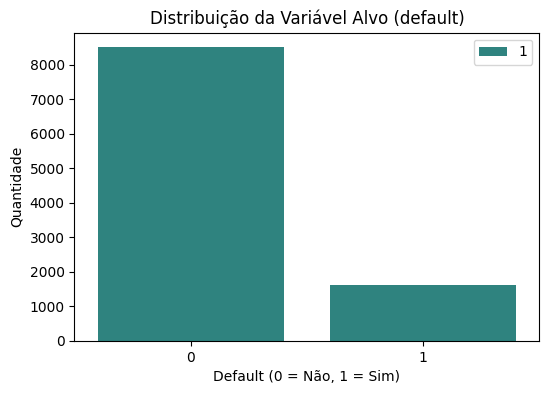

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["default"], hue=1, palette="viridis")
plt.title("Distribuição da Variável Alvo (default)")
plt.xlabel("Default (0 = Não, 1 = Sim)")
plt.ylabel("Quantidade")
plt.show()


🔹 **Variável Alvo ("default")**

A média de 0.16 indica que apenas 16% dos clientes estão inadimplentes, o que pode indicar um desbalanceamento nos dados.

O grafico mostra que ha menos  clientes inadimplentes. 

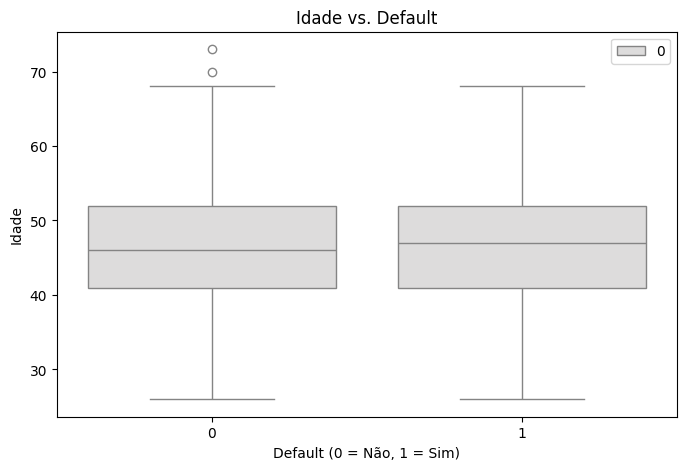

In [6]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["default"], y=df["idade"],hue=0, palette="coolwarm")
plt.title("Idade vs. Default")
plt.xlabel("Default (0 = Não, 1 = Sim)")
plt.ylabel("Idade")
plt.show()

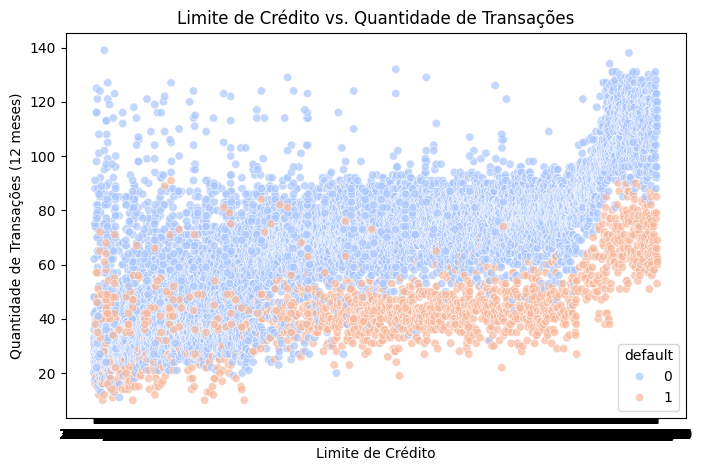

In [7]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["limite_credito"], y=df["qtd_transacoes_12m"], hue=df["default"], palette="coolwarm", alpha=0.7)
plt.title("Limite de Crédito vs. Quantidade de Transações")
plt.xlabel("Limite de Crédito")
plt.ylabel("Quantidade de Transações (12 meses)")
plt.show()

In [8]:
print(df.columns)
#3️⃣ Forçar remoção da coluna apenas se existir
df = df.drop(columns=["id"], errors="ignore")
df

Index(['id', 'default', 'idade', 'sexo', 'dependentes', 'escolaridade',
       'estado_civil', 'salario_anual', 'tipo_cartao',
       'meses_de_relacionamento', 'qtd_produtos', 'iteracoes_12m',
       'meses_inativo_12m', 'limite_credito', 'valor_transacoes_12m',
       'qtd_transacoes_12m'],
      dtype='object')


,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,M,2,mestrado,solteiro,$40K - $60K,blue,40,3,3,2,"4.003,91","15.476,26",117
10123,1,41,M,2,na,divorciado,$40K - $60K,blue,25,4,3,2,"4.277,04","8.764,88",69
10124,1,44,F,1,ensino medio,casado,menos que $40K,blue,36,5,4,3,"5.409,16","10.291,78",60
10125,1,30,M,2,mestrado,na,$40K - $60K,blue,36,4,3,3,"5.281,84","8.395,62",62


In [9]:
# Filtra apenas colunas numéricas
df_numerico = df.select_dtypes(include=["number"])
# Calcula a correlação
cor_target = df_numerico.corr()["default"].sort_values(ascending=False)
print(cor_target)

default                    1.000000
iteracoes_12m              0.204491
meses_inativo_12m          0.152449
dependentes                0.018991
idade                      0.018203
meses_de_relacionamento    0.013687
qtd_produtos              -0.150005
qtd_transacoes_12m        -0.371403
Name: default, dtype: float64


In [10]:
# Transformando variáveis categóricas em variáveis dummies (one-hot encoding)
df_encoded = pd.get_dummies(df, drop_first=True)  # Converte variáveis categóricas para numéricas

#df_encoded

In [11]:
# Calcula a correlação
#cor_target = df_encoded.corr()["default"].sort_values(ascending=False)
#print(cor_target)

In [12]:
# Preenchendo valores ausentes para variáveis numéricas com a média
#df.fillna(df.mean(), inplace=True) caso haja
# Preenchendo valores ausentes para variáveis categóricas com a moda
#df['variavel_categorica'] = df['variavel_categorica'].fillna(df['variavel_categorica'].mode()[0]) caso haja


Escala de Variáveis Numéricas: Algumas variáveis tem  escala diferente (por exemplo, idade pode estar na faixa de 20-70, enquanto limite_credito pode estar na faixa de 500-5000). Isso pode afetar o desempenho de alguns algoritmos (como regressão ou redes neurais).

Uma transformação comum é normalizar ou padronizar as variáveis.

Padronização (Standardization): Subtrai a média e divide pelo desvio padrão, resultando em uma distribuição com média 0 e desvio 1.

Normalização (Normalization): Escala as variáveis para o intervalo [0, 1].

In [13]:
scaler = StandardScaler()
df_encoded['idade'] = scaler.fit_transform(df_encoded[['idade']])

In [14]:
pca = PCA(n_components=5)  # Número de componentes principais
df_pca = pca.fit_transform(df_encoded)
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])

# Anexar as variáveis PCA ao dataset original
df_encoded = pd.concat([df_encoded, df_pca], axis=1)

Redução de Dimensionalidade (Opcional):

Se você tem muitas variáveis, pode ser interessante realizar uma redução de dimensionalidade para evitar o sobreajuste (overfitting).

Uma técnica popular é a PCA (Principal Component Analysis), que transforma as variáveis originais em um número reduzido de componentes principais.

In [15]:
#Separar Dados de Treinamento e Teste
# Definir variáveis explicativas (X) e variável alvo (y)
X = df_encoded.drop(columns=["default"])  # Variáveis explicativas
y = df_encoded["default"]  # Variável alvo

# Separar em treino e teste (80% para treino, 20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
#Treinar o Modelo de Árvore de Decisão

# Criar o modelo de Árvore de Decisão
model = DecisionTreeClassifier(random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar a performance
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.8919052319842053

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94      1699
           1       0.69      0.59      0.64       327

    accuracy                           0.89      2026
   macro avg       0.81      0.77      0.79      2026
weighted avg       0.89      0.89      0.89      2026



Text(0.5, 1.0, 'Árvore de Decisão')

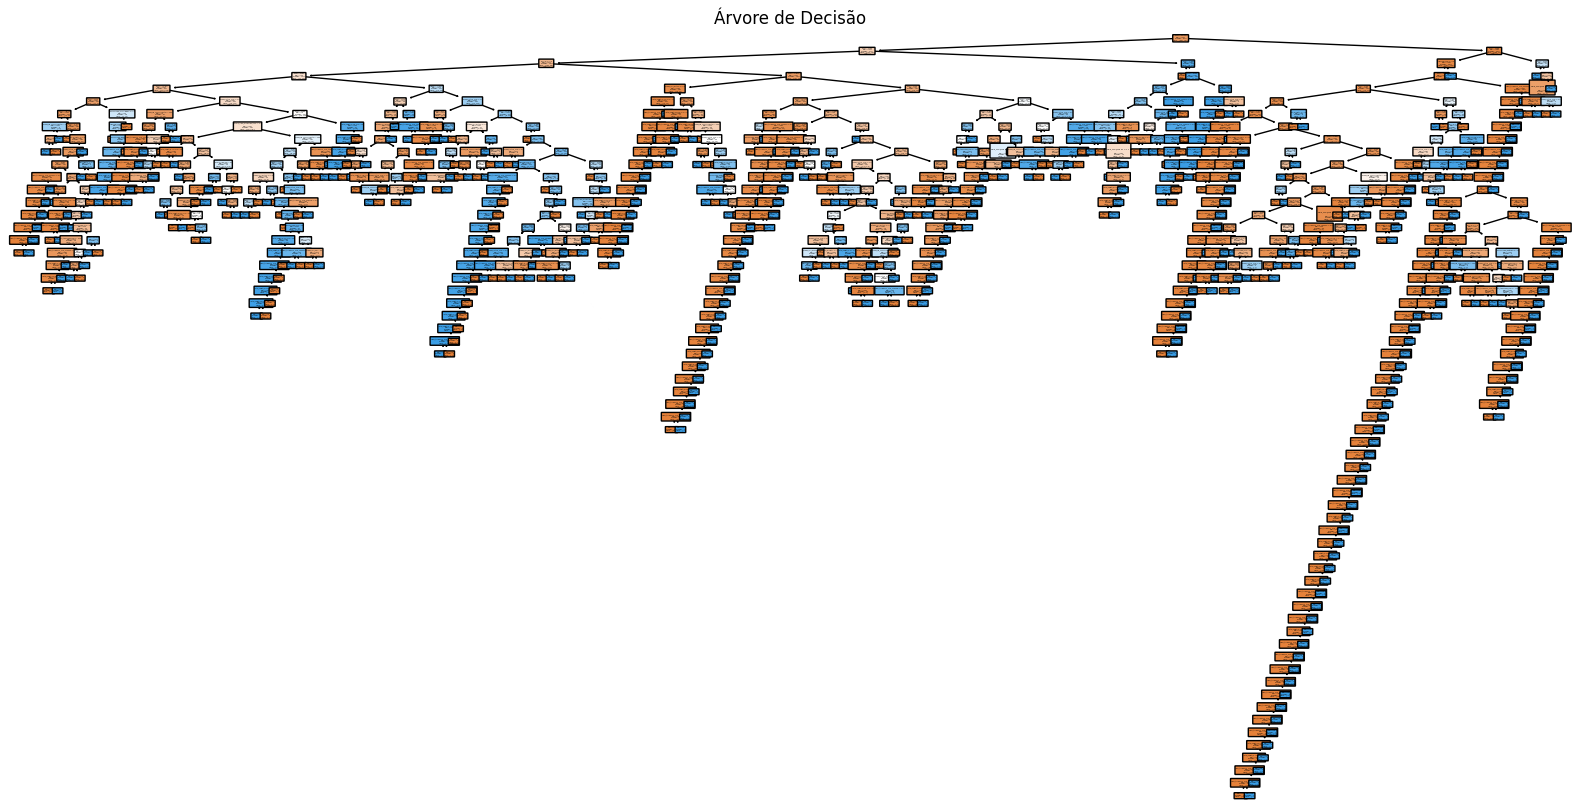

In [17]:

# Visualizar a árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["0", "1"], rounded=True)
plt.title("Árvore de Decisão")
#plt.show()

In [18]:
# Ajustando o modelo com parâmetros específicos
model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.8696939782823297

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92      1699
           1       0.63      0.46      0.53       327

    accuracy                           0.87      2026
   macro avg       0.77      0.70      0.73      2026
weighted avg       0.86      0.87      0.86      2026



Para a curva ROC, precisamos das probabilidades previstas e não apenas das classificações finais (0 ou 1). Por isso, vamos obter as probabilidades de previsão.

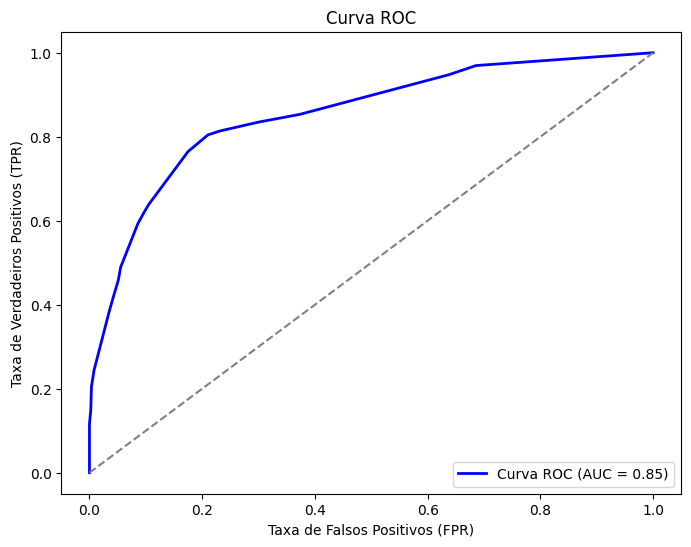

In [19]:
from sklearn.metrics import roc_curve, auc
# Obter as probabilidades previstas para o conjunto de teste
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilidade de classe 1
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))

# Plotando a curva ROC
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')

# Plotando a linha de aleatoriedade (um modelo aleatório)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Títulos e labels
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend(loc="lower right")

# Exibindo o gráfico
plt.show()


TESTANDO O MODELO RANDOM

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Criando e treinando o modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Fazendo previsões
y_pred_rf = rf_model.predict(X_test)

# Avaliação
print("Acurácia Random Forest:", accuracy_score(y_test, y_pred_rf))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_rf))

Acurácia Random Forest: 0.8919052319842053

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      1699
           1       0.86      0.40      0.54       327

    accuracy                           0.89      2026
   macro avg       0.88      0.69      0.74      2026
weighted avg       0.89      0.89      0.87      2026



TESTANDO Regressão Logística

In [21]:
from sklearn.linear_model import LogisticRegression

# Criando e treinando o modelo
logreg_model = LogisticRegression(max_iter=100)
logreg_model.fit(X_train, y_train)

# Fazendo previsões
y_pred_logreg = logreg_model.predict(X_test)

# Avaliação
print("Acurácia Regressão Logística:", accuracy_score(y_test, y_pred_logreg))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_logreg))

c:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Acurácia Regressão Logística: 0.8652517275419546

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1699
           1       0.66      0.35      0.46       327

    accuracy                           0.87      2026
   macro avg       0.77      0.66      0.69      2026
weighted avg       0.85      0.87      0.85      2026



TESTANDO XGBOOST

In [22]:
from xgboost import XGBClassifier
from xgboost import XGBRegressor

# Criando e treinando o modelo
xgb_model = XGBClassifier( eval_metric="logloss", random_state=42)
xgb_model.fit(X_train, y_train)

# Fazendo previsões
y_pred_xgb = xgb_model.predict(X_test)

# Avaliação
print("Acurácia XGBoost:", accuracy_score(y_test, y_pred_xgb))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_xgb))


Acurácia XGBoost: 0.912142152023692

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1699
           1       0.78      0.63      0.70       327

    accuracy                           0.91      2026
   macro avg       0.86      0.80      0.82      2026
weighted avg       0.91      0.91      0.91      2026



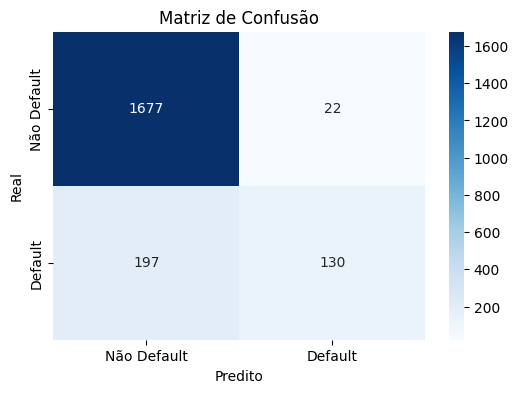

In [23]:
from sklearn.metrics import confusion_matrix

# Criar a matriz de confusão
cm = confusion_matrix(y_test, y_pred_rf)  # Troque pelo modelo que quiser analisar

# Plotar a matriz de confusão
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Não Default", "Default"], yticklabels=["Não Default", "Default"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()